<a href="https://colab.research.google.com/github/Mano1720/DL-ML-/blob/main/Assignment_8_REGex(Heart%20Attack%20Analysis%20%26%20Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1** 

***k Manoj***

Referral Id:SIRSS2309

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('/content/heart.csv')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **EDA**
*Let's get some boxplots for each numeric variable and a correlation heatmap for the dataset.*

In [14]:
numerics_features=['age', 'sex', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'slp', 'caa']

eda_df = data.loc[:, numerics_features].copy()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

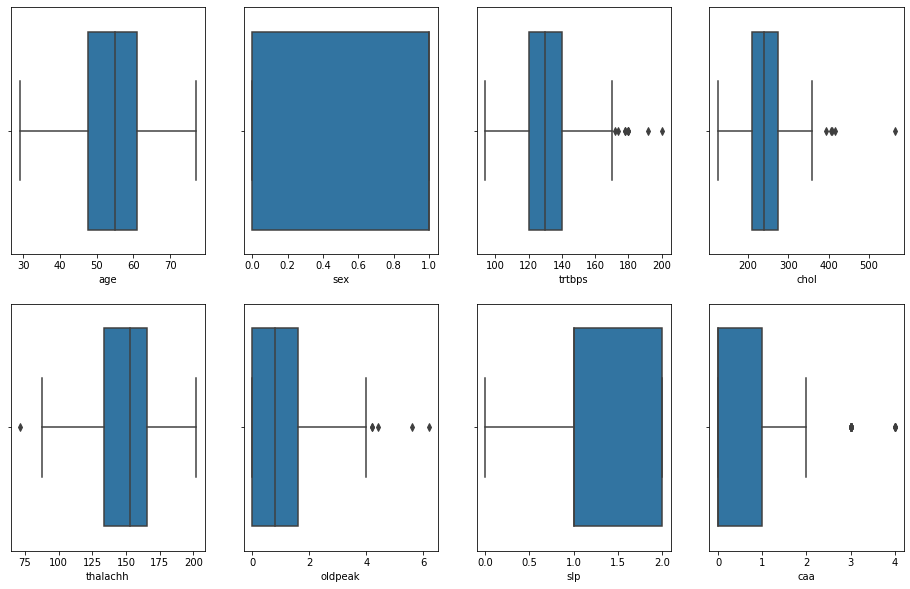

In [17]:
plt.figure(figsize=(16,10))

for i in range(len(eda_df.columns)):
  plt.subplot(2,4,i+1)
  sns.boxplot(eda_df[eda_df.columns[i]])

In [18]:
corr=eda_df.corr()

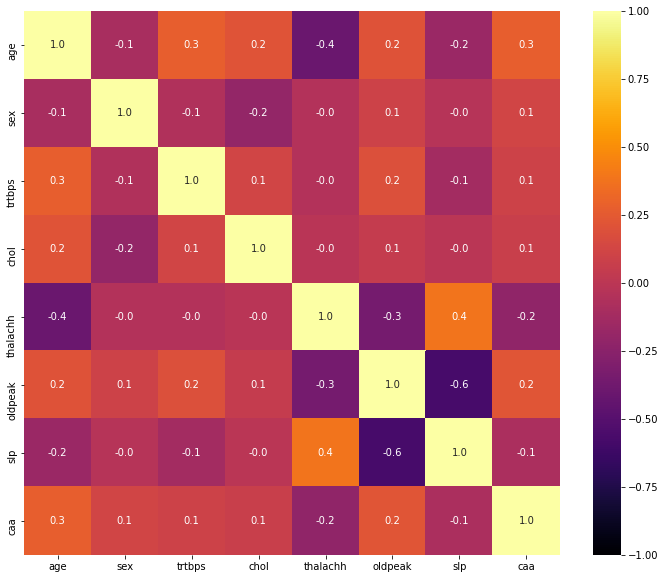

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt='.1f',cmap='inferno',vmin='-1')

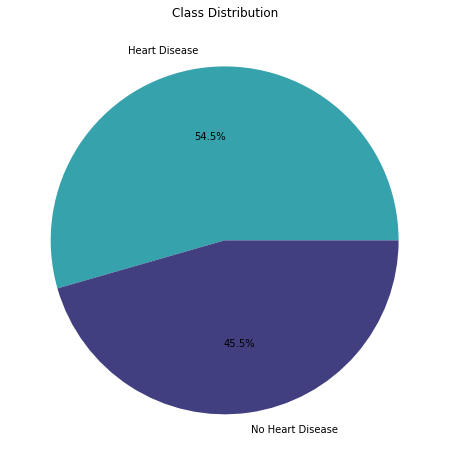

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(data['output'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

***Preprocessing***

In [73]:
def onehot_encode(df,column_dict):
  df=df.copy()
  for column, prefix in column_dict.items():
    dummies=pd.get_dummies(df[column],prefix=prefix)
    df=pd.concat([df,dummies],axis=1)
    df.drop(column,axis=1)
  return df  

  

In [74]:
def preprocessing(data,scaler):
  df=data.copy()

  # One-hot encode the nominal features
  nominal_features=['cp','slp','thall']
  df=onehot_encode(df,dict(zip(nominal_features,['CP','SP','TH'])))

  # Split df into X and y
  X=df.drop('output',axis=1).copy()
  y=df['output'].copy()

  # Scale X
  X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

  return X,y


In [75]:
X,y=preprocessing(data,RobustScaler())

In [77]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,CP_0,CP_1,CP_2,CP_3,SP_0,SP_1,SP_2,TH_0,TH_1,TH_2,TH_3
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0


In [79]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

***Training***

In [92]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [93]:
X_train.shape

(242, 24)

In [94]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
score=svm_model.score(X_test,y_test)
print("Support Vector Machine Accuracy: {:.2f}%".format(score*100))

Support Vector Machine Accuracy: 86.89%
